### Import the needed libraries

In [1]:
import numpy as np
from six.moves import cPickle
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

### Load the CIFAR-10 batch

In [9]:
# Read mini batch
batch1 = cPickle.load(open("data_batch_1", "rb"))["data"]
# Reshape array to (10000, 32, 32, 3)
batch1 = batch1.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1).astype("float32").reshape((-1, 3, 32, 32))

### Now lets display a random sample

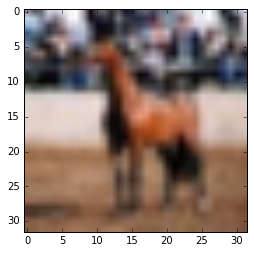

In [5]:
%matplotlib inline
plt.imshow(batch1[np.random.choice(batch1.shape[0], 1)][0])

### Now we need to normalize our data

In [10]:
# This will range the pixels from 0 to 1
batch1 = batch1 / 256.

### Now lets declare the Theano symbols and equations

In [7]:
# Mini batch of images
imgs = T.ftensor4('input image')

# 1 Filter
w = theano.shared(value=np.random.randn(1, 3, 3, 3)
                  .astype(imgs.dtype), name="Filter")

# The mini batch after convolution
output = T.nnet.conv.conv2d(imgs, w)

# A compiled function to convolve the mini batch
ConvLayer = theano.function([imgs], T.nnet.sigmoid(output))

### Next we compute the output of the conv layer on our Data

In [11]:
convolved = ConvLayer(batch1)

### Lets pick a random sample and see how it looks like after passing through the convolutional layer

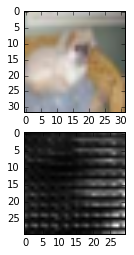

In [24]:
rand_index = np.random.randint(0, batch1.shape[0], 1)[0]
Image_Height = batch1[rand_index].shape[1]
Image_Width = batch1[rand_index].shape[2]
Image_channels = batch1[rand_index].shape[0]

plt.subplot(2, 1, 1)
plt.imshow(batch1[rand_index].reshape((Image_Height, Image_Width, Image_channels)))


plt.subplot(2, 1, 2)
plt.imshow(convolved[rand_index][0], cmap='binary')